# Keras图像增强技术详解

在深度学习中，数据短缺是我们经常面临的一个问题，虽然现在有不少公开数据集，但跟大公司掌握的海量数据集相比，数量上仍然偏少，而某些特定领域的数据采集更是非常困难。根据之前的学习可知，数据量少带来的最直接影响就是过拟合。那有没有办法在现有少量数据基础上，降低或解决过拟合问题呢？

答案是有的，就是数据增强技术。我们可以对现有的数据，如图片数据进行平移、翻转、旋转、缩放、亮度增强等操作，以生成新的图片来参与训练或测试。这种操作可以将图片数量提升数倍，由此大大降低了过拟合的可能。本文将详解图像增强技术在Keras中的原理和应用。

## Keras中的ImageDataGenerator类

图像增强的官网地址是：https://keras.io/preprocessing/image/ ，API使用相对简单，功能也很强大。

先介绍的是ImageDataGenerator类，这个类定义了图片该如何进行增强操作，其API及参数定义如下：

```
keras.preprocessing.image.ImageDataGenerator(
　　　　featurewise_center=False, #输入值按照均值为0进行处理
　　　　samplewise_center=False, #每个样本的均值按0处理
　　　　featurewise_std_normalization=False, #输入值按照标准正态化处理
　　　　samplewise_std_normalization=False, #每个样本按照标准正态化处理 
　　　　zca_whitening=False, # 是否开启增白
　　　　zca_epsilon=1e-06, 
　　　　rotation_range=0, #图像随机旋转一定角度，最大旋转角度为设定值
　　　　width_shift_range=0.0, #图像随机水平平移，最大平移值为设定值。若值为小于1的float值，则可认为是按比例平移，若大于1，则平移的是像素；若值为整型，平移的也是像素；假设像素为2.0，则移动范围为[-1,1]之间
　　　　height_shift_range=0.0, #图像随机垂直平移，同上
　　　　brightness_range=None, # 图像随机亮度增强，给定一个含两个float值的list，亮度值取自上下限值间
　　　　shear_range=0.0, # 图像随机修剪
　　　　zoom_range=0.0, # 图像随机变焦 
　　　　channel_shift_range=0.0, 
　　　　fill_mode='nearest', #填充模式，默认为最近原则，比如一张图片向右平移，那么最左侧部分会被临近的图案覆盖
　　　　cval=0.0, 
　　　　horizontal_flip=False, #图像随机水平翻转
　　　　vertical_flip=False, #图像随机垂直翻转
　　　　rescale=None, #缩放尺寸
　　　　preprocessing_function=None, 
　　　　data_format=None, 
　　　　validation_split=0.0, 
　　　　dtype=None)
```

下文将以mnist和花类的数据集进行图片操作，其中花类（17种花，共1360张图片）数据集可见百度网盘： https://pan.baidu.com/s/1YDA_VOBlJSQEijcCoGC60w 。让我们以直观地方式看看各参数能带来什么样的图片变化。

下载之后是个压缩包，请解压到本课件的根目录，解压后的文件路径为./17flowers/

<img src='./image/17flowers.png' />

### 对MNIST的随机旋转

我们可用mnist数据集对图片进行随机旋转，旋转的最大角度由参数定义。

In [2]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import backend as K
%matplotlib inline

In [3]:
K.set_image_dim_ordering('th')

(train_data, train_label), (test_data, test_label) = mnist.load_data()
train_data = train_data.reshape(train_data.shape[0], 1, 28, 28)
train_data = train_data.astype('float32')

In [4]:
# 创建图像生成器，指定对图像操作的内容，rotation_range指定了旋转的最大角度，
# 但是每张图片的旋转角度是在这个最大角度中的随机数
datagen = ImageDataGenerator(rotation_range=90)
# 图像生成器要训练的数据
datagen.fit(train_data)

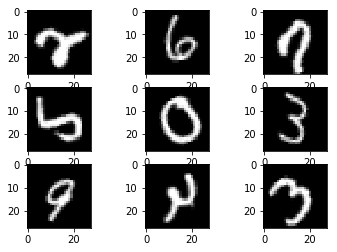

In [5]:
# 这是个图像生成迭代器，是可以无限生成各种新图片，我们指定每轮迭代只生成9张图片
for batch_data, batch_label in datagen.flow(train_data, train_label, batch_size=9):
    for i in range(0, 9):
        # 创建一个 3*3的九宫格，以显示图片
        plt.subplot(330 + 1 + i)
        plt.imshow(batch_data[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    plt.show()
    break